# Import Path

In [2]:
import os
import sys

p = os.path.abspath('../')
if p not in sys.path:
    print('Adding {} path to system'.format(p))
    sys.path.append(p)

Adding C:\Cerebral\_MarioSandBox\Python\covid path to system


The [Epidemiological Data from the COVID-19 Outbreak in Canada](https://github.com/ishaberry/Covid19Canada) located in github.



In [3]:
from myFunctions.covid import covid as cvd

In [4]:
import pandas as pd
import numpy as np

# Get Data

In [5]:
covidObject = cvd(cached=True)

Getting COVID data
cached


In [6]:
covidObject.getProcessedData('Ontario')

In [7]:
# convert dictionary into dataframe
dfData = pd.DataFrame.from_dict(covidObject.dataProcess)
# convert date col to datetime pandas series
dfData['date'] = pd.to_datetime(dfData['date'])
# convert index to dates
dfData = dfData.set_index('date')

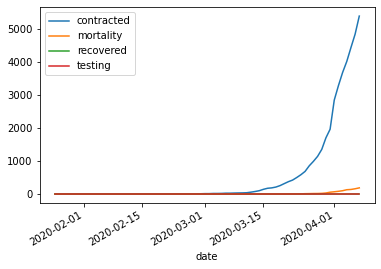

In [8]:
dfData.plot()

# Modeling Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.preprocessing import MinMaxScaler

In [9]:
y = dfData['contracted'].to_numpy()
x = np.arange(len(y))
ln_Y = np.log(y)

In [13]:
### Use the relation ln(Y) = ln(A) - Bx to fit x to ln(Y)
exp_reg = LinearRegression()
exp_reg.fit(x.reshape(-1, 1), ln_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#### You can introduce weights as well to apply more bias to the smaller x values, 
#### I am transforming x arbitrarily to apply higher arbitrary weights to smaller x values
exp_reg_weighted = LinearRegression()
exp_reg_weighted.fit(x.reshape(-1, 1), ln_Y, sample_weight=np.array(1/((x - 100)**2)).reshape(-1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

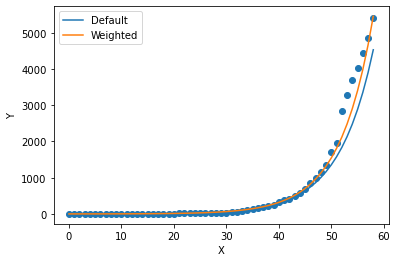

In [15]:
### Get predicted values of Y
Y_pred = np.exp(exp_reg.predict(x.reshape(-1, 1)))
Y_pred_weighted = np.exp(exp_reg_weighted.predict(x.reshape(-1, 1)))

### Plot
plt.scatter(x, y)
plt.plot(x, Y_pred, label='Default')
plt.plot(x, Y_pred_weighted, label='Weighted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()